# Exploratory Data Analysis for Automated Essay Scoring

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [2]:
# Load data
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (17307, 3)
Test data shape: (3, 2)


In [3]:
# Display basic information about the training data
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB
None
              score
count  17307.000000
mean       2.948402
std        1.044899
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000


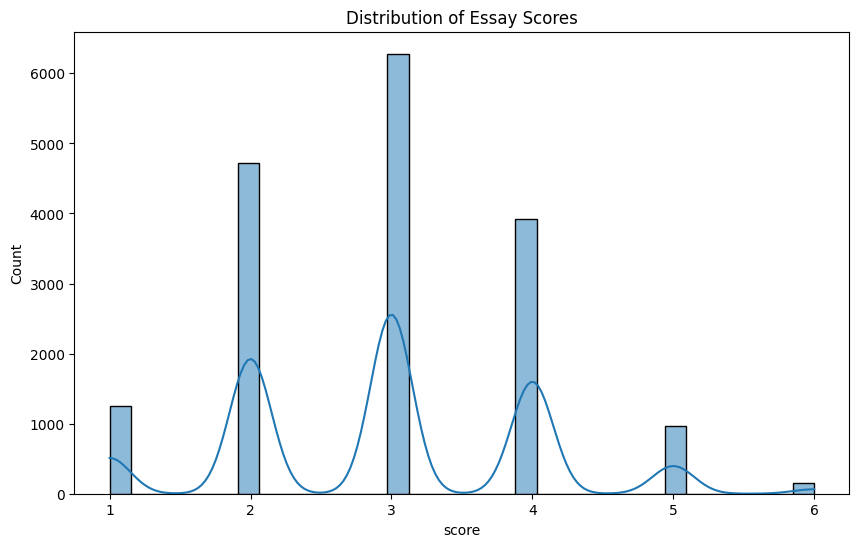

In [4]:
# Plot score distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['score'], kde=True)
plt.title('Distribution of Essay Scores')
plt.show()

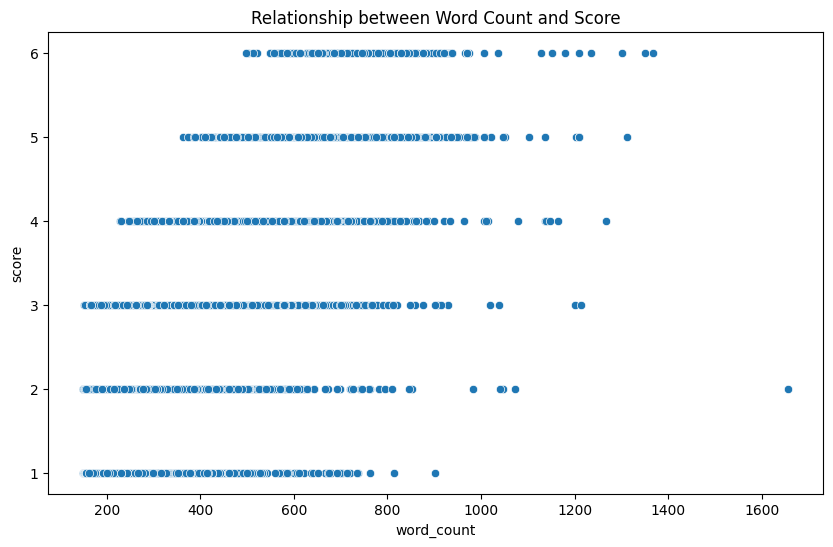

In [5]:
# Word count analysis
train_data['word_count'] = train_data['full_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='score', data=train_data)
plt.title('Relationship between Word Count and Score')
plt.show()

In [6]:
# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text).lower())
    return ' '.join([w for w in tokens if w not in stop_words])

# Apply preprocessing
train_data['processed_text'] = train_data['full_text'].apply(preprocess)
test_data['processed_text'] = test_data['full_text'].apply(preprocess)

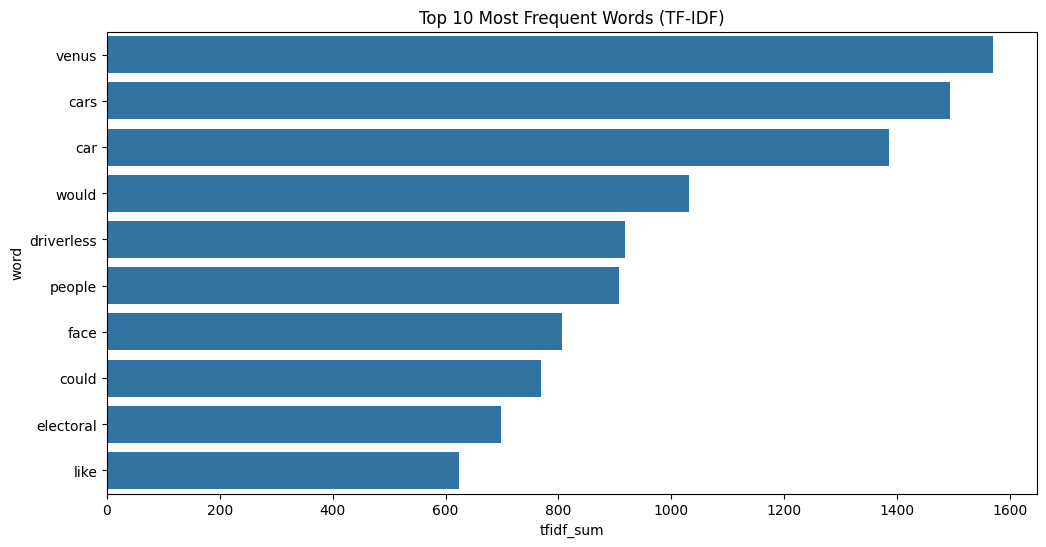

In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
train_tfidf = vectorizer.fit_transform(train_data['processed_text'])

# Get the top 10 most frequent words
feature_names = vectorizer.get_feature_names_out()
tfidf_sum = train_tfidf.sum(axis=0).A1
top_words = pd.DataFrame({'word': feature_names, 'tfidf_sum': tfidf_sum}).sort_values('tfidf_sum', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='tfidf_sum', y='word', data=top_words)
plt.title('Top 10 Most Frequent Words (TF-IDF)')
plt.show()

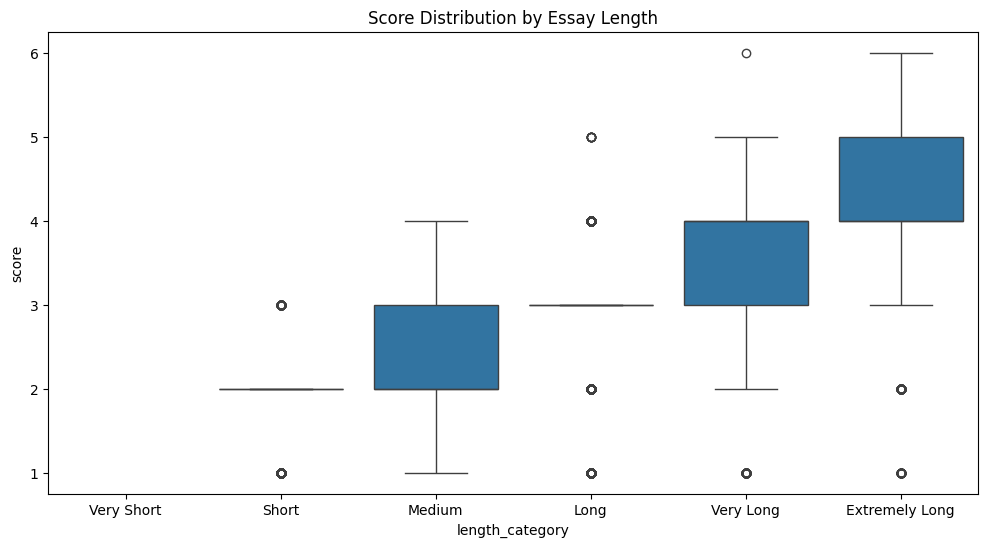

In [8]:
# Analyze score distribution by essay length
train_data['length_category'] = pd.cut(train_data['word_count'], bins=[0, 100, 200, 300, 400, 500, float('inf')], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long', 'Extremely Long'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='length_category', y='score', data=train_data)
plt.title('Score Distribution by Essay Length')
plt.show()

In [9]:
# Correlation between word count and score
correlation = train_data['word_count'].corr(train_data['score'])
print(f"Correlation between word count and score: {correlation:.2f}")

Correlation between word count and score: 0.69


## Conclusions

1. The score distribution shows:
A multimodal distribution with peaks at scores 2, 3, and 4. Score 3 has the highest frequency, followed by 2 and 4. There are fewer essays with scores of 1, 5, and 6.
2. There appears to be a relationship between essay length and score, with:
Longer essays generally receiving higher scores. The box plot illustrates that as the essay length category increases from "Short" to "Extremely Long", the median score tends to increase. The highest median scores are seen for "Very Long" and "Extremely Long" essays.
3. The most frequent words in the essays are:
"Venus", "cars", "car", "would", "driverless", "people", "face", "could", "electoral", and "like", based on the TF-IDF scores shown in the bar chart.
4. The correlation between word count and score is:
Positive but weak. The scatter plot reveals a slight upward trend in scores as word count increases, but there's considerable overlap and variability. Essays with higher word counts tend to achieve higher scores more often, but short essays can also receive high scores, and long essays can receive low scores.

These insights can help guide our feature engineering and model development process.